In [1]:
  import numpy as np
  import matplotlib.pyplot as plt
  from scipy.stats import norm

In [12]:
# np.random.seed(1)
NUM_TRIALS = 2000
BANDIT_MEANS = [1, 2, 3]

In [20]:
class Bandit:
  def __init__(self, true_mean):
    self.true_mean = true_mean
    # prior for mu => N(0, 1)
    self.lambda_ = 1
    self.predicted_mean = 0
    self.tau = 1
    self.sum_x = 0 # for convenience
    self.N = 0

  def pull(self):
    return np.random.randn() / np.sqrt(self.tau) + self.true_mean

  def sample(self):
    return np.random.randn() / np.sqrt(self.tau) + self.predicted_mean

  def update(self, x):
    self.lambda_ += self.tau
    self.sum_x += x
    self.predicted_mean = self.tau * self.sum_x / self.lambda_
    self.N += 1

In [17]:
def plot(bandits, trial):
  x = np.linspace(-3, 6, 200)
  for bandit in bandits:
    y = norm.pdf(x, bandit.predicted_mean, np.sqrt(1 / bandit.lambda_))
    plt.plot(x, y, label=f"real p: {bandit.true_mean:.4f}, num plays: {bandit.N}")
  plt.title(f"Bandit distributions after {trial} trials")
  plt.legend()
  plt.show()

In [18]:
def experiment():
  bandits = [Bandit(p) for p in BANDIT_MEANS]

  sample_points = [5, 10, 20, 50, 100, 200, 500, 1000, 1999]
  rewards = np.zeros(NUM_TRIALS)
  for i in range(NUM_TRIALS):
    # thompson sampling
    j = np.argmax([bandit.sample() for bandit in bandits])

    if i in sample_points:
      plot(bandits, i)

    x = bandits[j].pull()
    rewards[i] = x

    bandits[j].update(x)

  # total reward
  print("total reward earned:", rewards.sum())
  # print("overall win rate:", rewards.sum() / NUM_TRIALS)

  print("num of times selected each bandit:", [bandit.N for bandit in bandits])

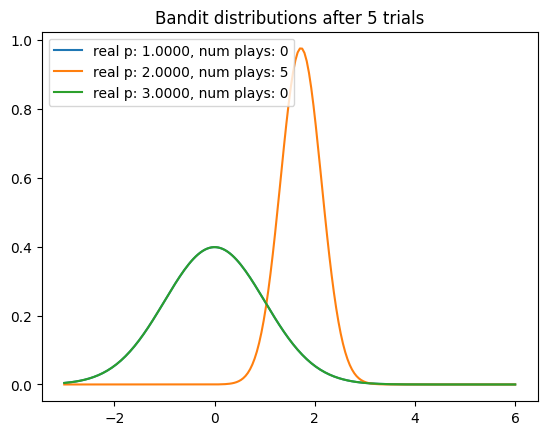

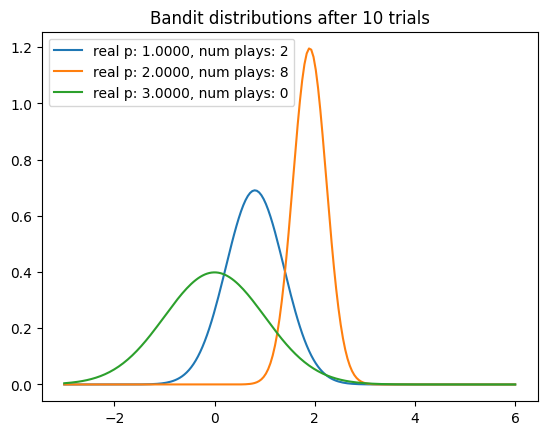

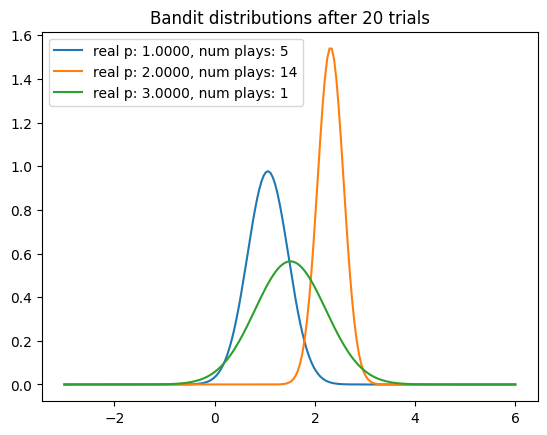

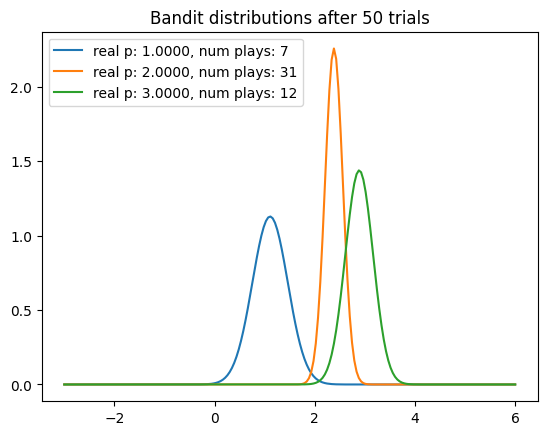

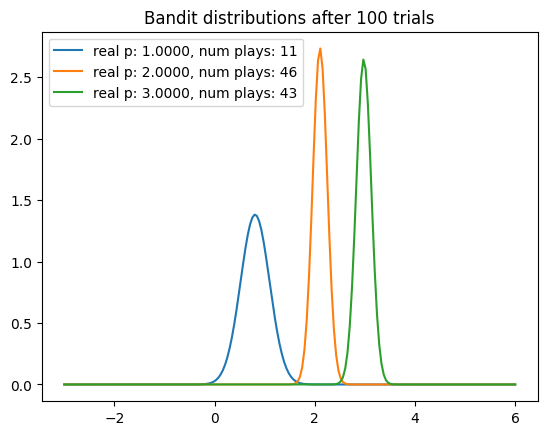

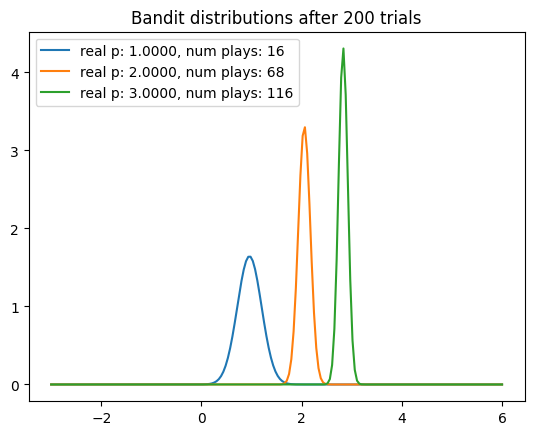

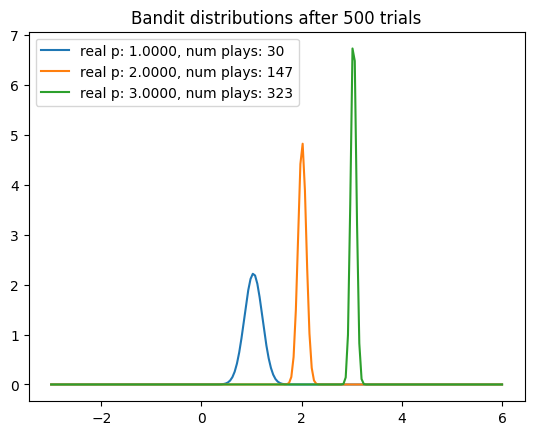

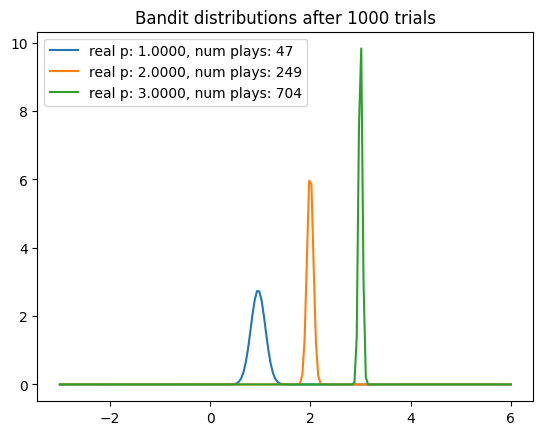

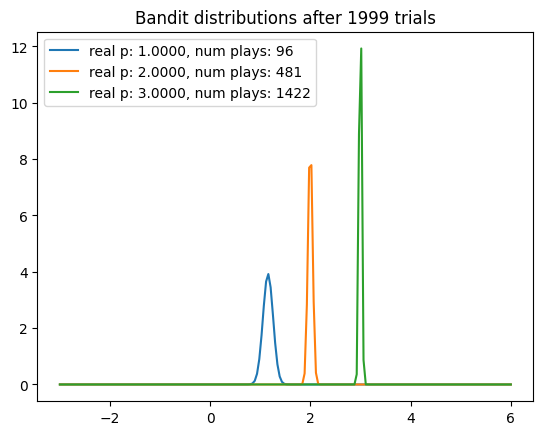

total reward earned: 5342.716485441322
num of times selected each bandit: [96, 481, 1423]


In [21]:
experiment()